In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import joblib

# 加载加利福尼亚房价数据集
california = fetch_california_housing(data_home='./data')
X = california.data
y = california.target

# 加载保存的梯度回归模型和标准化器
loaded_scaler = joblib.load('scaler.pkl')

model = joblib.load('sgd_regression_model.pkl')

# 对新数据进行标准化
new_house_data_scaled = loaded_scaler.transform(X)

# 使用模型进行预测
y_pred = model.predict(new_house_data_scaled)
print("前五个预测的房价:")
for i in range(5):
    print(f"样本 {i+1}: {y_pred[i]:.2f}")

# 计算均方误差
mse = mean_squared_error(y, y_pred)
print(f"均方误差 (MSE): {mse:.4f}")


前五个预测的房价:
样本 1: 4.08
样本 2: 3.94
样本 3: 3.64
样本 4: 3.22
样本 5: 2.41
均方误差 (MSE): 0.5328


In [10]:
# 加载保存的梯度回归模型和标准化器
# loaded_scaler1 = joblib.load('scaler.pkl')

# 加载保存的lasso回归模型，下次一定记得先保存标准化器，再保存模型
model1 = joblib.load('lasso_model.pkl')

# 对新数据进行标准化
# new_house_data_scaled1 = loaded_scaler1.transform(X)

# 使用模型进行预测
y_pred1 = model1.predict(X)
print("前五个预测的房价:")
for i in range(5):
    print(f"样本 {i+1}: {y_pred1[i]:.2f}")

# 计算均方误差
mse1 = mean_squared_error(y, y_pred1)
print(f"均方误差 (MSE): {mse1:.4f}")

前五个预测的房价:
样本 1: 4.15
样本 2: 3.99
样本 3: 3.68
样本 4: 3.25
样本 5: 2.41
均方误差 (MSE): 0.5252


岭回归模型的均方误差 (MSE): 0.5559

岭回归系数:
MedInc: 0.8543
HouseAge: 0.1226
AveRooms: -0.2942
AveBedrms: 0.3390
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8962
Longitude: -0.8691
截距: 2.0719


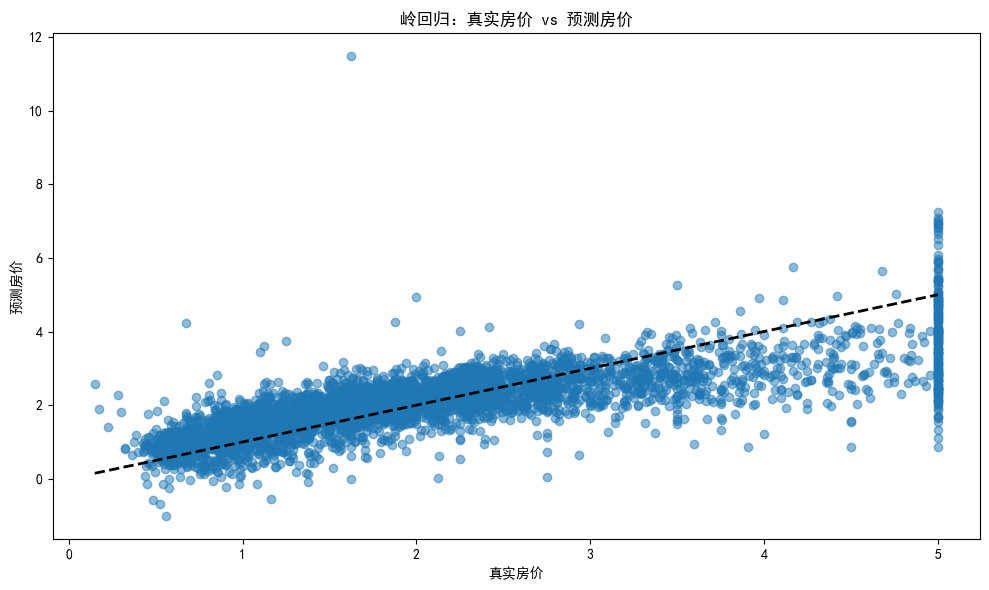

岭回归模型和标准化器已保存


In [ ]:
# 导入需要的库
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建标准化器
ridge_scaler = StandardScaler()
# 使用训练数据拟合标准化器
X_train_scaled = ridge_scaler.fit_transform(X_train)
# 对测试数据进行标准化
X_test_scaled = ridge_scaler.transform(X_test)

# 创建岭回归模型
ridge_model = Ridge(alpha=1.0,random_state=40)  # alpha是正则化强度参数，其值越大，模型越简单，越不容易过拟合
# 训练模型
ridge_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_ridge = ridge_model.predict(X_test_scaled)

# 计算均方误差
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"岭回归模型的均方误差 (MSE): {mse_ridge:.4f}")

# 查看模型回归系数
print("\n岭回归系数:")
for name, coef in zip(california.feature_names, ridge_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {ridge_model.intercept_:.4f}") # 截距是当所有特征都为0时，预测值为多少

# 可显示中文
plt.rcParams['font.family'] = ['SimHei']

# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('岭回归：真实房价 vs 预测房价')
plt.tight_layout()
plt.show()

# 保存标准化器
joblib.dump(ridge_scaler, 'ridge_scaler.pkl')
# 保存岭回归模型
joblib.dump(ridge_model, 'ridge_model.pkl')

print("岭回归模型和标准化器已保存")


In [20]:
# 逻辑回归模型
# 注意：逻辑回归通常用于分类问题，而不是回归问题
# 导入乳腺癌数据集
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 读取乳腺癌数据集
df = pd.read_csv('data/breast-cancer-wisconsin.csv', header=None)
# 为数据集添加列名
column_names = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 
                'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df.columns = column_names

# 处理缺失值（将'?'替换为NaN，然后删除或填充）
df = df.replace('?', np.nan)
df = df.dropna()  # 删除包含缺失值的行

# 将特征和目标分离
X = df.iloc[:, 1:-1].astype(float)  # 所有特征列
y = df.iloc[:, -1].astype(int)  # 目标列（Class）

# 将目标变量转换为二分类（2为良性，4为恶性，转换为0和1）
y = (y == 4).astype(int)  # 将4（恶性）转换为1，2（良性）转换为0

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建逻辑回归模型,max_iter是最大迭代次数,l2是正则化项,liblinear是逻辑回归的优化算法
log_reg = LogisticRegression(max_iter=1000,C=0.1,penalty='l2',random_state=42,solver='liblinear') #C是正则化参数的倒数，C值越小，正则化强度越大

# 训练模型
log_reg.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # 获取正类的概率

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("乳腺癌预测模型评估:")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1分数: {f1:.4f}")

print("\n混淆矩阵:")
print(conf_matrix)

print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=['良性', '恶性']))

# 查看模型系数（特征重要性）
print("\n逻辑回归系数（特征重要性）:")
for name, coef in zip(X.columns, log_reg.coef_[0]):
    print(f"{name}: {coef:.4f}")
print(f"截距: {log_reg.intercept_[0]:.4f}")

乳腺癌预测模型评估:
准确率 (Accuracy): 0.9659
精确率 (Precision): 0.9733
召回率 (Recall): 0.9359
F1分数: 0.9542

混淆矩阵:
[[125   2]
 [  5  73]]

分类报告:
              precision    recall  f1-score   support

          良性       0.96      0.98      0.97       127
          恶性       0.97      0.94      0.95        78

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205


逻辑回归系数（特征重要性）:
Clump Thickness: 0.6608
Uniformity of Cell Size: 0.4682
Uniformity of Cell Shape: 0.5572
Marginal Adhesion: 0.4646
Single Epithelial Cell Size: 0.1999
Bare Nuclei: 0.9545
Bland Chromatin: 0.6055
Normal Nucleoli: 0.4022
Mitoses: 0.4353
截距: -0.7996


In [23]:


# 保存模型和标准化器
joblib.dump(log_reg, 'logistic_model.pkl')
joblib.dump(scaler, 'logistic_scaler.pkl')
print("逻辑回归模型和标准化器已保存")

# 解释逻辑回归原理
print("\n=== 逻辑回归原理解释 ===")
print("1. 逻辑回归使用sigmoid函数将线性组合转换为概率值(0-1之间)")
print("2. 公式: P(y=1|x) = 1 / (1 + e^(-z)), 其中z = w0 + w1*x1 + w2*x2 + ... + wn*xn")
print("3. 逻辑回归通过最大化对数似然函数来优化参数")
print("4. 正则化(C参数)用于防止过拟合，C值越小，正则化强度越大")
print("5. 决策边界: 当P(y=1|x) > 0.5时，预测为正类")


逻辑回归模型和标准化器已保存

=== 逻辑回归原理解释 ===
1. 逻辑回归使用sigmoid函数将线性组合转换为概率值(0-1之间)
2. 公式: P(y=1|x) = 1 / (1 + e^(-z)), 其中z = w0 + w1*x1 + w2*x2 + ... + wn*xn
3. 逻辑回归通过最大化对数似然函数来优化参数
4. 正则化(C参数)用于防止过拟合，C值越小，正则化强度越大
5. 决策边界: 当P(y=1|x) > 0.5时，预测为正类(高价房)
